# Cross sections of photon interactions with atoms

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from radiator.figurestyle import *
from scipy.interpolate import InterpolatedUnivariateSpline
define_figure_style()

from radiator.crosssections import *
cs = cross_sections(cs={'photion': 'VFKY1996', 'collion': 'AR', 'collex': 'SKD'})

## Hydrogen atom
Here we plot the cross sections associated with Hydrogen atoms.

Incoherent scattering stands for scattering which leads to ionization of an atom.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in power
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: invalid value encountered in power


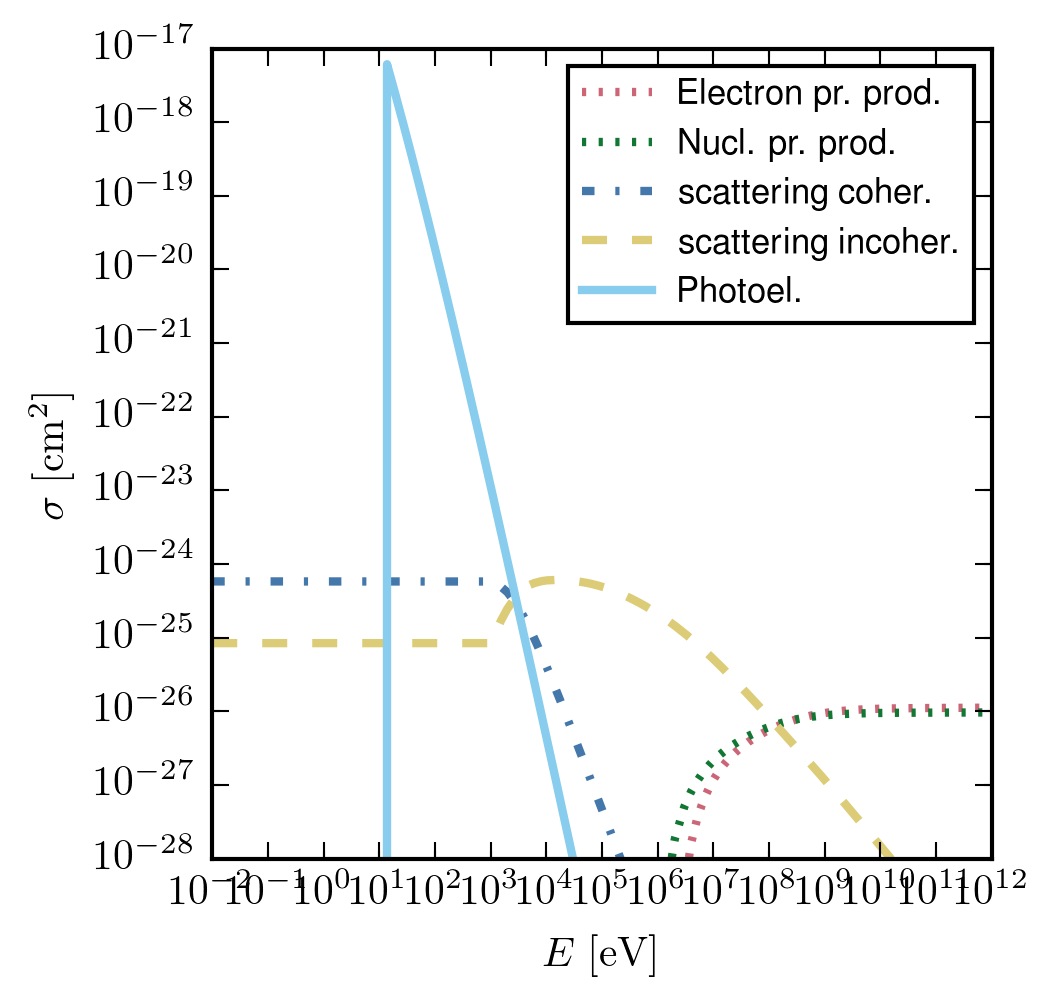

In [8]:
Eg_list = np.logspace(-2, 12, 1000)/6.24e11
temp = np.zeros([len(Eg_list), 4])
EgeV_list = Eg_list*6.24e11


crossections = np.loadtxt('radiator/datafiles/crossdata.dat')
# crossectionsHe = np.loadtxt('radiator/datafiles/crossdataHe.dat')
# crossectionsO = np.loadtxt('radiator/datafiles/crossdataO.dat')
# crossectionsHe2 = np.loadtxt('radiator/datafiles/photoionHe.dat')
s = InterpolatedUnivariateSpline(np.log10(crossections[:,0]), np.log10(crossections[:,-3]), k=1)
factor = 10**s(np.log10(EgeV_list/1e6))
plt.plot(EgeV_list, factor*1e-24, ':', lw=2, label='Electron pr. prod.')
s = InterpolatedUnivariateSpline(np.log10(crossections[:,0]), np.log10(crossections[:,-4]), k=1)
factor = 10**s(np.log10(EgeV_list/1e6))
plt.plot(EgeV_list, factor*1e-24, ':', lw=2, label='Nucl. pr. prod.')
s = InterpolatedUnivariateSpline(np.log10(crossections[:,0]), np.log10(crossections[:,-7]), k=1)
factor = 10**s(np.log10(EgeV_list/1e6))
plt.plot(EgeV_list, factor*1e-24, '-.', lw=2, label='scattering coher.')
s = InterpolatedUnivariateSpline(np.log10(crossections[:,0]), np.log10(crossections[:,-6]), k=1)
factor = 10**s(np.log10(EgeV_list/1e6))
plt.plot(EgeV_list, factor*1e-24, '--', lw=2, label='scattering incoher.')
# s = InterpolatedUnivariateSpline(np.log10(crossectionsO[:,0]), np.log10(crossectionsO[:,-1]), k=1)
# factor = 10**s(np.log10(EgeV_list/1e6))
# plt.plot(EgeV_list, factor*1e-24, '-', lw=1, label='O cross total')
plt.plot(EgeV_list, cs.sigmaX(EgeV_list, 1, 1)*1e-18, lw=2, label='Photoel.')
# plt.plot(EgeV_list, sigmaX(EgeV_list, 8, 8)*1e-18, label='O phot 1996')
plt.xscale('log')
plt.xlabel(r'$E\;\mathrm{[eV]}$')
plt.ylabel(r'$\sigma\;\mathrm{[cm^{2}]}$')
plt.yscale('log')
plt.legend()
plt.ylim([1e-28, 1e-17])
plt.show()